# Лабораторная работа №1
## Выполнил студент группы Бвт2103 Сальников Владислав

### Оглавление
1. [Задание 1](#Задание-№1)
2. [Задание 2](#Задание-№2)
3. [Задание 3](#Задание-№3)
4. [Вывод](#Вывод)

### Задание №1
<i> Вызвать функцию print() и передать туда строку Hello, World! </i>

In [35]:
print("Hello world!")

Hello world!


### Задание №2
Написать генератор случайных матриц(многомерных), который принимает
опциональные параметры <b>m</b>, <b>n</b>, <b>min_limit</b>, <b>max_limit</b>, где <b>m</b> и <b>n</b> указывают размер
матрицы, а <b>min_lim</b> и <b>max_lim</b> - минимальное и максимальное значение для
генерируемого числа.

In [36]:
from random import randint, choice
import time
import matplotlib.pyplot as plt
import numpy as np

In [37]:
user_m = int(input())
user_n = int(input())
user_min_limit = int(input())
user_max_limit = int(input())
user_m, user_n, user_min_limit, user_max_limit  
matrix = [[randint(user_min_limit, user_max_limit) for _ in range(user_m)] for _ in range(user_n)]
#print(matrix)

### Задание №3
Реализовать методы сортировки строк числовой матрицы в соответствии с
заданием. Оценить время работы каждого алгоритма сортировки и сравнить его со
временем стандартной функции сортировки. Испытания проводить на сгенерированных
матрицах.

In [38]:
import copy

--- 18 ms ---


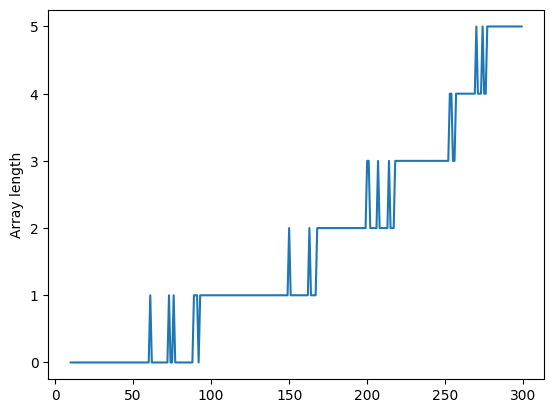

In [39]:
# Сортировка выбором.
# Берётся срез массива, в котором минимальный элемент переносят в самый левый угол,
# после чего срез уменьшается и цикл повторяется.
start_time = time.time()

def choose_sort(arr):
    for b in range(len(arr)):
        min = 10000
        d = b
        while d<len(arr):
            if arr[d]< min: 
                min = arr[d]
                min_index = d
            d += 1
        arr[min_index],arr[b] = arr[b], arr[min_index]     

for arr in matrix:
    choose_sort(arr) 

#print(matrix)

#графики

arr = [np.random.randint(-1000,1000,i) for i in range(10, 300, 1)]
arr_len = [len(arr[i]) for i in range(len(arr))]
sort_time = []

for i in arr:
    start_time = time.time()
    choose_sort(i)
    sort_time += [round((time.time() - start_time)*1000)]

plt.ylabel("Time")
plt.ylabel("Array length")
plt.plot(arr_len, sort_time)

print("--- {0} ms ---".format(round((time.time() - start_time)*1000)))

--- 15 ms ---


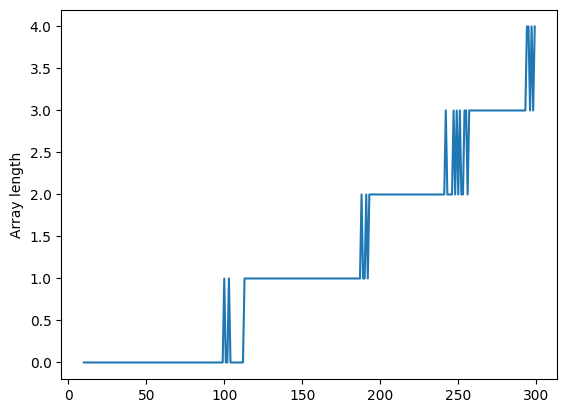

In [40]:
# Сортировка вставкой.
start_time = time.time()

def insert_sort(arr):
    for i in range(1,len(arr)):
        key = arr[i]
        j = i -1
        while key < arr[j] and j >= 0:
            arr[j+1] =arr [j]
            j -= 1
        arr[j+1] = key
for arr in matrix:
    insert_sort(arr)

#print(matrix)

#графики

arr = [np.random.randint(-1000,1000,i) for i in range(10, 300, 1)]
arr_len = [len(arr[i]) for i in range(len(arr))]
sort_time = []

for i in arr:
    start_time = time.time()
    insert_sort(i)
    sort_time += [round((time.time() - start_time)*1000)]

plt.ylabel("Time")
plt.ylabel("Array length")
plt.plot(arr_len, sort_time)

print("--- {0} ms ---".format(round((time.time() - start_time)*1000)))

--- 20 ms ---


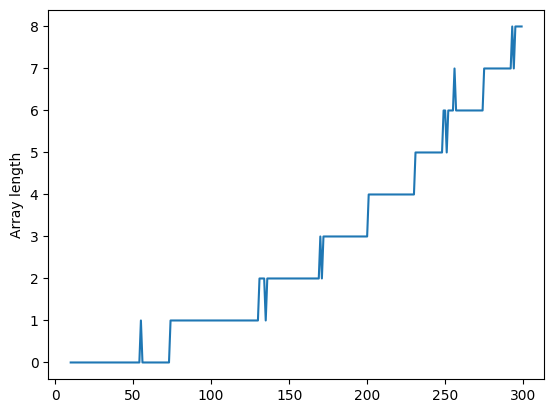

In [41]:
# Сортировка обменом. || Сортировка пузырьком.
start_time = time.time()

def bubble_sort(arr):
    for i in range(len(arr)-1):
        for j in range(i+1,len(arr)):
            if arr[j] < arr[i]: arr[j], arr[i] = arr[i], arr[j]

for arr in matrix:
    bubble_sort(arr)
    
#print(matrix)

#графики

arr = [np.random.randint(-1000,1000,i) for i in range(10, 300, 1)]
arr_len = [len(arr[i]) for i in range(len(arr))]
sort_time = []

for i in arr:
    start_time = time.time()
    bubble_sort(i)
    sort_time += [round((time.time() - start_time)*1000)]

plt.ylabel("Time")
plt.ylabel("Array length")
plt.plot(arr_len, sort_time)

print("--- {0} ms ---".format(round((time.time() - start_time)*1000)))

--- 13 ms ---


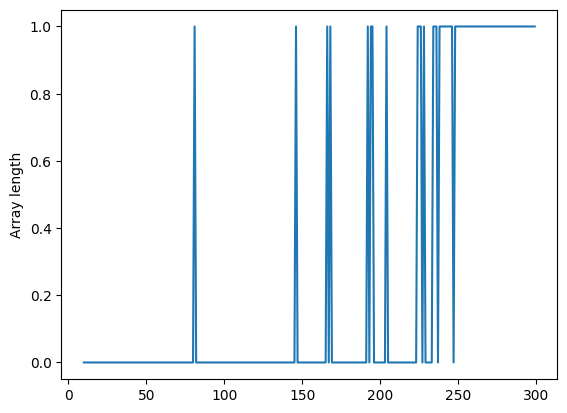

In [42]:
# Сортировка Шелла.
start_time = time.time()

def shell_sort(d):
    step = len(d)//2
    while step > 0:
        for i in range(step, len(d), 1):
            j = i
            x = j - step
            while x >= 0 and d[x] > d[j]:
                d[j], d[x] = d[x], d[j]
                j = x
                x = j - step
        step //= 2
for arr in matrix:
    shell_sort(arr)

#print(matrix)

#графики

arr = [np.random.randint(-1000,1000,i) for i in range(10, 300, 1)]
arr_len = [len(arr[i]) for i in range(len(arr))]
sort_time = []

for i in arr:
    start_time = time.time()
    shell_sort(i)
    sort_time += [round((time.time() - start_time)*1000)]

plt.ylabel("Time")
plt.ylabel("Array length")
plt.plot(arr_len, sort_time)

print("--- {0} ms ---".format(round((time.time() - start_time)*1000)))

--- 17 ms ---


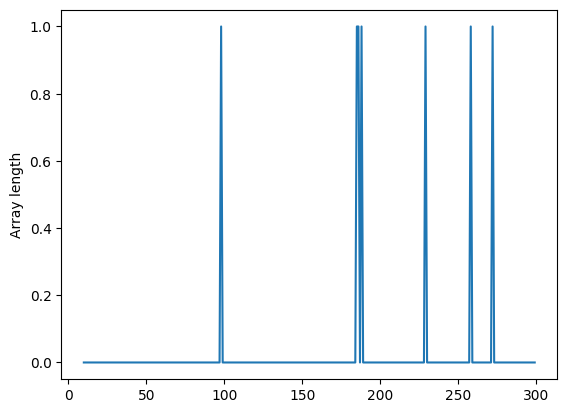

In [43]:
# Быстрая сортировка.
start_time = time.time()

def quick(arr):

    if len(arr) <= 1:
        return arr
    else:
        mid = choice(arr)
        low = []
        middle = []
        high = []

        for i in range(len(arr)):
            if arr[i] > mid: high.append(arr[i])
            if arr[i] < mid: low.append(arr[i])
            if arr[i] == mid: middle.append(arr[i]) 
        return quick(low) + middle + quick(high)
    
for i in range(len(matrix)):
    matrix[i] = quick(matrix[i])  

#print(matrix)

#графики

arr = [np.random.randint(-1000,1000,i) for i in range(10, 300, 1)]
arr_len = [len(arr[i]) for i in range(len(arr))]
sort_time = []

for i in arr:
    start_time = time.time()
    quick(i)
    sort_time += [round((time.time() - start_time)*1000)]

plt.ylabel("Time")
plt.ylabel("Array length")
plt.plot(arr_len, sort_time)
   
print("--- {0} ms ---".format(round((time.time() - start_time)*1000)))
    

--- 13 ms ---


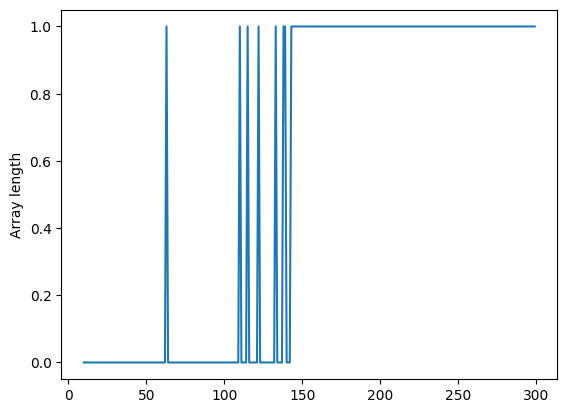

In [44]:
# Турнирная сортировка.
start_time = time.time()

def tree(arr, n, i):
    largest = i 
    l = 2 * i + 1   
    r = 2 * i + 2   

    if l < n and arr[i] < arr[l]:
        largest = l

    if r < n and arr[largest] < arr[r]:
        largest = r

    if largest != i:
        arr[i],arr[largest] = arr[largest],arr[i] 
        tree(arr, n, largest)

def TournamentSort(arr):
    n = len(arr)

    for i in range(n, -1, -1):
        tree(arr, n, i)

    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        tree(arr, i, 0)

for i in range(len(matrix)):
    TournamentSort(matrix[i])  

#графики

arr = [np.random.randint(-1000,1000,i) for i in range(10, 300, 1)]
arr_len = [len(arr[i]) for i in range(len(arr))]
sort_time = []

for i in arr:
    start_time = time.time()
    TournamentSort(i)
    sort_time += [round((time.time() - start_time)*1000)]

plt.ylabel("Time")
plt.ylabel("Array length")
plt.plot(arr_len, sort_time)

#print(matrix)
print("--- {0} ms ---".format(round((time.time() - start_time)*1000)))

### Вывод


Я научился писать первые простейшие алгоритмы на Python